Modèle Rose


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix,classification_report
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [ ]:
df=pd.read_csv('df_pretraite.csv')

In [ ]:
df.shape

(148517, 42)

In [ ]:
df=df[df['attack-type']!='normal']

In [ ]:
df.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [ ]:
 dico_classement_attaque={'neptune':3,'smurf':3,'apache2':3,'back':2,'processtable':3,'pod':3,'mailbomb':3,'land':3,'teardrop':3,
                          'udpstorm':3,'saint':5,'mscan':5,'satan':5,'nmap':5,'ipsweep':5,'portsweep':5,'guess_passwd':2,'snmpgetattack':2,
                          'snmpguess':2,'ftp_write':2,'imap':2,'phf':2,'warezclient':2,'spy':2,'buffer_overflow':1,'httptunnel':1,'ps':1,'multihop':2,
                          'named':1,'sendmail':1,'loadmodule':1,'xterm':1,'worm':1,'rootkit':1,'xlock':1,'perl':2,'xsnoop':1,'sqlattack':1,'warezmaster':4}

#Élévation de Privilèges :buffer_overflow, loadmodule, rootkit, httptunnel, ps, named,sendmail, xterm, worm, xlock, xsnoop, sqlattack:1
#Accès Non Autorisé : warezclient, guess_passwd, ftp_write, multihop, imap, phf, spy, perl,back, snmpgetattack, snmpguess:2
#Déni de Service (DoS):neptune, smurf, pod, land, teardrop, apache2, processtable, mail-bomb, udpstorm. :3
#Attaques de Gestion Warez : warezmaster:4
#Port Scanning :ipsweep, portsweep, nmap, satan, saint, mscan:5


In [ ]:
df['attack-type']=df['attack-type'].map(dico_classement_attaque)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71463 entries, 2 to 148516
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     71463 non-null  int64  
 1   protocol_type                71463 non-null  int64  
 2   service                      71463 non-null  int64  
 3   flag                         71463 non-null  int64  
 4   src_bytes                    71463 non-null  int64  
 5   dst_bytes                    71463 non-null  int64  
 6   land                         71463 non-null  int64  
 7   wrong_fragment               71463 non-null  int64  
 8   urgent                       71463 non-null  int64  
 9   hot                          71463 non-null  int64  
 10  num_failed_logins            71463 non-null  int64  
 11  logged_in                    71463 non-null  int64  
 12  num_compromised              71463 non-null  int64  
 13  root_shell          

<Axes: xlabel='attack-type', ylabel='count'>

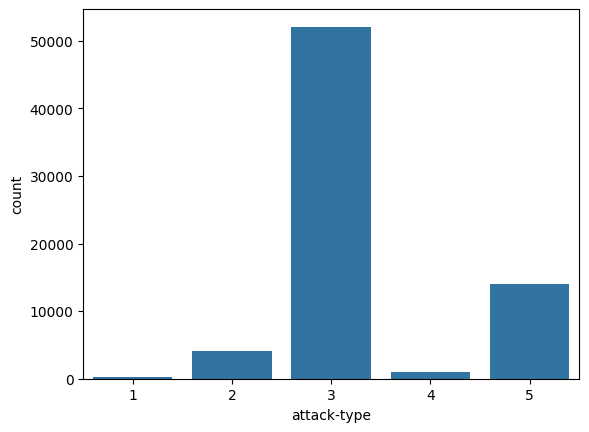

In [ ]:
sns.countplot(x='attack-type',data=df)

In [ ]:
dico_classement_attaque={'neptune':2,'smurf':2,'apache2':2,'back':1,'processtable':2,'pod':2,'mailbomb':2,'land':2,'teardrop':2,
                          'udpstorm':2,'saint':3,'mscan':3,'satan':3,'nmap':3,'ipsweep':3,'portsweep':3,'guess_passwd':1,'snmpgetattack':1,
                          'snmpguess':1,'ftp_write':1,'imap':1,'phf':1,'warezclient':1,'spy':1,'buffer_overflow':1,'httptunnel':1,'ps':1,'multihop':1,
                          'named':1,'sendmail':1,'loadmodule':1,'xterm':1,'worm':1,'rootkit':1,'xlock':1,'perl':1,'xsnoop':1,'sqlattack':1,'warezmaster':3}

#Élévation de Privilèges :buffer_overflow, loadmodule, rootkit, httptunnel, ps, named,sendmail, xterm, worm, xlock, xsnoop, sqlattack:1
#Accès Non Autorisé : warezclient, guess_passwd, ftp_write, multihop, imap, phf, spy, perl,back, snmpgetattack, snmpguess:2
#Déni de Service (DoS):neptune, smurf, pod, land, teardrop, apache2, processtable, mail-bomb, udpstorm. :3
#Attaques de Gestion Warez : warezmaster:4
#Port Scanning :ipsweep, portsweep, nmap, satan, saint, mscan:5

In [ ]:
df['attack-type']=df['attack-type'].map(dico_classement_attaque)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71463 entries, 2 to 148516
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     71463 non-null  int64  
 1   protocol_type                71463 non-null  int64  
 2   service                      71463 non-null  int64  
 3   flag                         71463 non-null  int64  
 4   src_bytes                    71463 non-null  int64  
 5   dst_bytes                    71463 non-null  int64  
 6   land                         71463 non-null  int64  
 7   wrong_fragment               71463 non-null  int64  
 8   urgent                       71463 non-null  int64  
 9   hot                          71463 non-null  int64  
 10  num_failed_logins            71463 non-null  int64  
 11  logged_in                    71463 non-null  int64  
 12  num_compromised              71463 non-null  int64  
 13  root_shell          

<Axes: xlabel='attack-type', ylabel='count'>

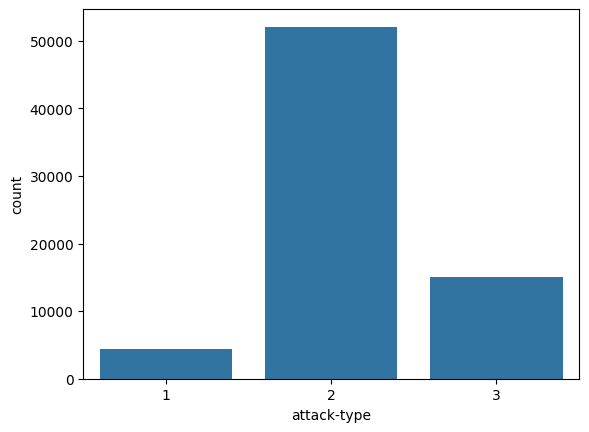

In [ ]:
sns.countplot(x='attack-type',data=df)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X=df.drop('attack-type',axis=1).values
y=df['attack-type'].values

In [ ]:
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
y=y[:].reshape(-1,1)
encoder= OneHotEncoder(sparse_output=False)
y=encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_test.shape

(14293, 40)

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
log_directory='logs\\fit'
timestamp=datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory=log_directory+'\\'+timestamp
board= TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True, write_images=True, update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [ ]:
model=Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7157 - loss: 0.6888 - val_accuracy: 0.9634 - val_loss: 0.1173
Epoch 2/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1425 - val_accuracy: 0.9836 - val_loss: 0.0704
Epoch 3/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0972 - val_accuracy: 0.9884 - val_loss: 0.0462
Epoch 4/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9787 - loss: 0.0741 - val_accuracy: 0.9903 - val_loss: 0.0381
Epoch 5/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0600 - val_accuracy: 0.9915 - val_loss: 0.0328
Epoch 6/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0533 - val_accuracy: 0.9920 - val_loss: 0.0304
Epoch 7/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0460 - val_accuracy: 0.9933 - val_loss: 0.0270
Epoch 8/600
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9884 - loss: 0.0419 - val_accu

In [ ]:
losses_rose=pd.DataFrame(model.history.history)

In [ ]:
epochs=len(losses_rose)

<Axes: >

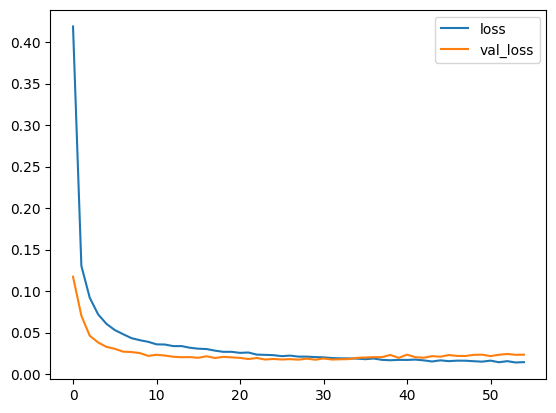

In [ ]:
losses_rose[['loss','val_loss']].plot()

<Axes: >

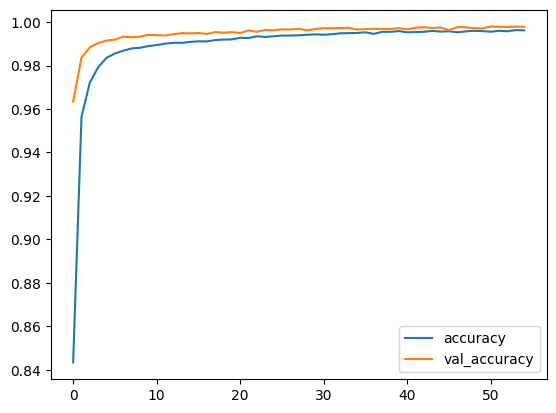

In [ ]:
losses_rose[['accuracy','val_accuracy']].plot()

In [ ]:
predictions_rose=np.argmax(model.predict(X_test), axis=1)

447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
y_test=np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test,predictions_rose))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       889
           1       1.00      1.00      1.00     10415
           2       0.99      1.00      1.00      2989

    accuracy                           1.00     14293
   macro avg       1.00      0.99      0.99     14293
weighted avg       1.00      1.00      1.00     14293



In [ ]:
confusion_matrix(y_test,predictions_rose)

array([[  871,     3,    15],
       [    0, 10411,     4],
       [    4,     5,  2980]])

In [ ]:
model.save('MRose.h5')
model.save('MRose.keras')

In [ ]:
from joblib import dump

In [ ]:
dump(scaler,'scaler_MRose.pkl')

['scaler_MRose.pkl']

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
!python --version

Python 3.10.12
